In [2]:
import pandas as pd

In [3]:
dataframe = pd.read_csv("DadosEstatisticos-com-colunas-de-interesse.csv",sep=";",encoding='latin-1');

In [18]:
dataframe.rename(columns={'BAGAGEM (KG)': 'BAGAGEM'}, inplace = True)

In [10]:
dataframe.rename(columns={'EMPRESA (NACIONALIDADE)': 'EMPRESA_NACIONALIDADE'}, inplace = True)

In [27]:
dataframe.describe()

,ANO,MÊS,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),DISTÂNCIA VOADA (KM),DECOLAGENS,ASSENTOS,BAGAGEM
count,886509.000000,886509.000000,841719.000000,841719.000000,8.417190e+05,841719.000000,6.693110e+05,669847.000000,669846.000000,713859.000000
mean,2009.606717,6.460133,1929.220643,41.811299,2.376162e+04,247.191185,3.483849e+04,26.859036,3693.092381,23340.739691
std,5.900236,3.483967,4484.415889,154.505241,9.281107e+04,1982.754998,6.645658e+04,46.488975,7279.524038,52087.003366
min,2000.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2004.000000,3.000000,1.000000,0.000000,0.000000e+00,0.000000,1.644000e+03,2.000000,70.000000,85.000000
50%,2010.000000,6.000000,206.000000,0.000000,3.200000e+01,0.000000,8.584000e+03,11.000000,694.000000,2766.000000
75%,2015.000000,10.000000,1773.000000,20.000000,7.597000e+03,0.000000,3.549250e+04,31.000000,4563.000000,20658.000000
max,2020.000000,12.000000,92357.000000,7452.000000,4.018286e+06,189562.000000,1.015740e+06,918.000000,154845.000000,919417.000000


In [29]:
dataframe.columns

Index(['EMPRESA (SIGLA)', 'EMPRESA (NOME)', 'EMPRESA_NACIONALIDADE', 'ANO',
       'MÊS', 'AEROPORTO DE ORIGEM (SIGLA)', 'AEROPORTO DE ORIGEM (NOME)',
       'AEROPORTO DE ORIGEM (UF)', 'AEROPORTO DE ORIGEM (REGIÃO)',
       'AEROPORTO DE ORIGEM (PAÍS)', 'AEROPORTO DE ORIGEM (CONTINENTE)',
       'AEROPORTO DE DESTINO (SIGLA)', 'AEROPORTO DE DESTINO (NOME)',
       'AEROPORTO DE DESTINO (UF)', 'AEROPORTO DE DESTINO (REGIÃO)',
       'AEROPORTO DE DESTINO (PAÍS)', 'AEROPORTO DE DESTINO (CONTINENTE)',
       'NATUREZA', 'PASSAGEIROS PAGOS', 'PASSAGEIROS GRÁTIS',
       'CARGA PAGA (KG)', 'CARGA GRÁTIS (KG)', 'DISTÂNCIA VOADA (KM)',
       'DECOLAGENS', 'ASSENTOS', 'HORAS VOADAS', 'BAGAGEM'],
      dtype='object')

In [13]:
print("Tamanho do dataset:",len(dataframe))

Tamanho do dataset: 886509


In [39]:
dataframe.groupby(['NATUREZA'])['DECOLAGENS'].sum()

NATUREZA
DOMÉSTICA        15654456.0
INTERNACIONAL     2336989.0
Name: DECOLAGENS, dtype: float64

<AxesSubplot:title={'center':'Distribuição da Natureza de Decolagem dos últimos 20 anos'}, xlabel='Natureza', ylabel='Qtde de Decolagens'>

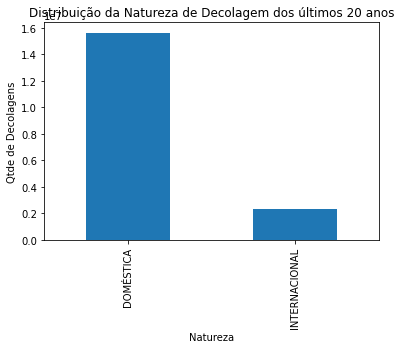

In [42]:
dataframe.groupby(['NATUREZA'])['DECOLAGENS'].sum().plot(kind='bar', title='Distribuição da Natureza de Decolagem dos últimos 20 anos', xlabel='Natureza',ylabel='Qtde de Decolagens')

In [25]:
dataframe.loc[dataframe.NATUREZA == 'DOMÉSTICA'].groupby(['ANO'])['DECOLAGENS'].sum()

ANO
2000    703553.0
2001    741064.0
2002    685853.0
2003    543580.0
2004    528501.0
2005    562529.0
2006    590194.0
2007    641087.0
2008    662764.0
2009    738445.0
2010    851663.0
2011    964598.0
2012    998323.0
2013    954221.0
2014    949062.0
2015    942342.0
2016    834666.0
2017    811665.0
2018    822592.0
2019    809925.0
2020    317829.0
Name: DECOLAGENS, dtype: float64

<AxesSubplot:title={'center':'Distribuição de Decolagens - Voos Domésticos'}, xlabel='Ano', ylabel='Qtde de Decolagens'>

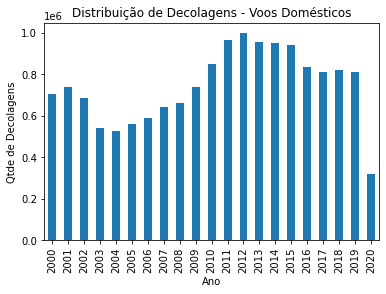

In [40]:
dataframe.loc[dataframe.NATUREZA == 'DOMÉSTICA'].groupby(['ANO'])['DECOLAGENS'].sum().plot(kind='bar', title='Distribuição de Decolagens - Voos Domésticos', xlabel='Ano',ylabel='Qtde de Decolagens')

<AxesSubplot:title={'center':'Distribuição de Decolagens - Voos Internacionais'}, xlabel='Ano', ylabel='Qtde de Decolagens'>

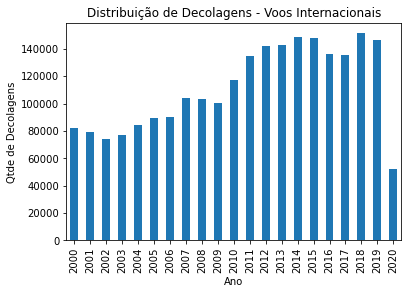

In [31]:
dataframe.loc[dataframe.NATUREZA == 'INTERNACIONAL'].groupby(['ANO'])['DECOLAGENS'].sum().plot(kind='bar', title='Distribuição de Decolagens - Voos Internacionais', xlabel='Ano',ylabel='Qtde de Decolagens')

**Cenário:
A partir de junho de 2017, as companhias aéreas brasileiras foram autorizadas a cobrar pela bagagem despachada e não são mais obrigadas a oferecer a franquia de uma bagagem de 23 kg para voos nacionais e de dois volumes com até 32 kg para voos internacionais.**

**Será que a partir de 2017, o peso de bagagem despachada por ano diminui?**

<AxesSubplot:title={'center':'Peso de Bagagens - Voos Domésticos'}, xlabel='Ano', ylabel='KG de bagagem'>

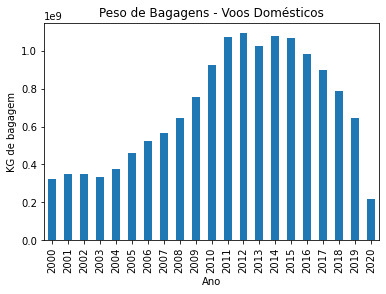

In [23]:
dataframe.loc[((dataframe.NATUREZA == 'DOMÉSTICA') & (dataframe.EMPRESA_NACIONALIDADE == 'BRASILEIRA'))].groupby(['ANO'])['BAGAGEM'].sum().plot(kind='bar', title='Peso de Bagagens - Voos Domésticos', xlabel='Ano',ylabel='KG de bagagem')

<AxesSubplot:title={'center':'Peso de Bagagens - Voos Internacionais'}, xlabel='Ano', ylabel='KG de bagagem'>

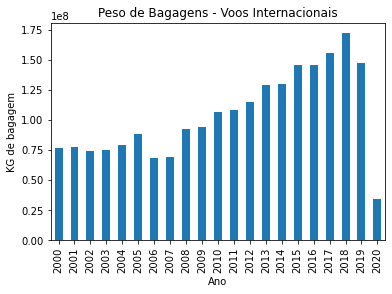

In [24]:
dataframe.loc[((dataframe.NATUREZA == 'INTERNACIONAL') & (dataframe.EMPRESA_NACIONALIDADE == 'BRASILEIRA'))].groupby(['ANO'])['BAGAGEM'].sum().plot(kind='bar', title='Peso de Bagagens - Voos Internacionais', xlabel='Ano',ylabel='KG de bagagem')